# Advance Prediction of Ames House Prices

#### Benjamin Umeh

## Problem Description

The problem here is to build a machine learning model that accurately predicts the final prices of residential homes in Ames, Iowa given some specific features of these homes.
The model is to be trained on 79 explanatory variables that describe (almost) every aspect of residential homes sampled across Ames, Iowa.

### Variables/Features List

In all there are 79 explanatory features and one target features - the SalesPrice. The features types cut across categorical variables(nominal and ordinal) and numerical variables(continuous and discrete).

From analysis and research the various features can be grouped under the various types of data as follows: 

#### Nominal Categorical Variables	
	"MSSubClass",
	"MSZoning",
	"Street",
	"Alley",
	"LotShape",
	"Neighborhood",
	"RoofStyle",
	"RoofMatl",
	"Exterior1st",
	"Exterior2nd",
	"MasVnrType",
	"Foundation",
	"Heating",
	"CentralAir",
	"GarageType",
	"MiscFeature",
	"MoSold",
	"SaleType",
	"SaleCondition",
	
#### Ordinal Categorical Variables	
	"LandContour",
	"Utilities",
	"LotConfig",
	"LandSlope",
	"Condition1",
	"Condition2",
	"BldgType",
	"HouseStyle",
	"OverallQual",
	"OverallCond",
	"ExterQual",
	"ExterCond",
	"BsmtQual",
	"BsmtCond",
	"BsmtExposure",
	"BsmtFinType1",
	"BsmtFinType2",
	"HeatingQC",
	"Electrical",
	"Functional",
	"FireplaceQu",
	"GarageFinish",
	"GarageQual",
	"GarageCond",
	"PavedDrive",
	"PoolQC",
	"Fence",
	"KitchenQual",
	
#### Discrete Numberical Variables	
	"BsmtFullBath",
	"BsmtHalfBath",
	"FullBath",
	"HalfBath",
	"BedroomAbvGr",
	"KitchenAbvGr",
	"TotRmsAbvGrd",
	"Fireplaces",
	"GarageYrBlt",
	"GarageCars",
	"YrSold",
	"YearBuilt",
	"YearRemodAdd",
	
#### Continuous Numberical Variables	
	"2ndFlrSF",
	"LowQualFinSF",
	"GrLivArea",
	"GarageArea",
	"WoodDeckSF",
	"OpenPorchSF",
	"EnclosedPorch",
	"3SsnPorch",
	"ScreenPorch",
	"PoolArea",
	"MiscVal",
	"SalePrice",
	"LotFrontage",
	"LotArea",
	"MasVnrArea",
	"BsmtFinSF1",
	"BsmtFinSF2",
	"BsmtUnfSF",
	"TotalBsmtSF",
	"1stFlrSF",

## Python Libraries and Setup

### Libraries

In [1]:
#Import necessary libraries
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import norm, skew
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

### Versions

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.3
sklearn: 0.20.3
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.17.0
Python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


### Setup

In [3]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## 1. Exploratory Data Analysis (EDA)

### Data Collection

In [4]:
# import the ames housing dataset

#train = pd.read_csv('../input/train.csv')
#test = pd.read_csv('../input/test.csv')

train = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/AmesHousing/train.csv')
test= pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/AmesHousing/test.csv')

In [5]:
#preview the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#preview the test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# Get the shape of the train and test data sets
train_shape = train.shape
print("The shape of the train dataset is {}".format(train_shape))

test_shape = test.shape
print("The shape of the test dataset is {}".format(test_shape))

The shape of the train dataset is (1460, 81)
The shape of the test dataset is (1459, 80)


#### Merge the train and test data while separating their Id and saving them.

In [8]:
#Save the "Id" columns of the train and test datasets separately
id_train = train[["Id"]]
id_test = test["Id"]


In [9]:
#Save the target feature column "SalePrice" separately
target_feat = train[['SalePrice']]

In [10]:
#print the first five of the target feature to confirm that it was well saved
target_feat.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [11]:
#Merge the train and test datasets
full_data = pd.concat([train, test], ignore_index=True, sort=False)
len(full_data)

2919

### Data Analysis & Visualisation

In [12]:
import pandas_profiling as pp

#Explore the data using pandas_profiling
profile = pp.ProfileReport(full_data)
profile

Number of variables,81
Number of observations,2919
Total Missing (%),6.5%
Total size in memory,1.8 MiB
Average record size in memory,648.0 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Analysing the Categorical and Numeric Features with the pandas_profiling EDA
Examining the warnings of the pandas_profiling EDA report from the perspective of the dataset description [here,](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt) reveals two interesting facts:
    1.The NA's in of the categorical features turn out as missing values in the pandas DataFrame. To resolve this we would need to fill the missing categorical values with "None" in our data pre-processing stage.
    2.The numerical features that correspond to the "NA" observations of the categorical features also turned out as zeros. So it is best to leave the zeros as they are, as there were actually nothing to measure
    3. It is reassuring to note that the percentages of missing values for the various categorical features are equal to the percentage of zeros for the various nuimerical features that measure them.

The EDA also showed a highly skewed __MiscVal__ which needs to be corrected.

There is also a report of 2 duplicate rows in the dataset which needs to be corrected. 

#### Analysing the Target Feature

_Visualise the distribution of the target feature_


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice Distribution')

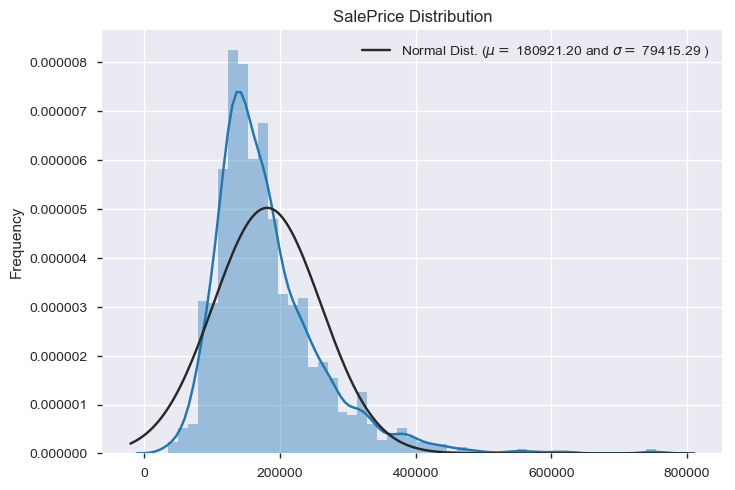

In [13]:
#Plot the distribution of the target feature "SalePrice" 
sns.distplot(target_feat , fit=norm);

# Get the distribution parameters
(mu, sigma) = norm.fit(target_feat)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

From the SalesPrice Distribution plot above we can see that the distribution of the SalePrice is skewed to the right and there need to be transformed. We would handle the transformation in the data preprocessing stage

#### Analysing Missing Values

_Visualise the missing values_

Text(0.5, 1.0, 'Missing Data Chart')

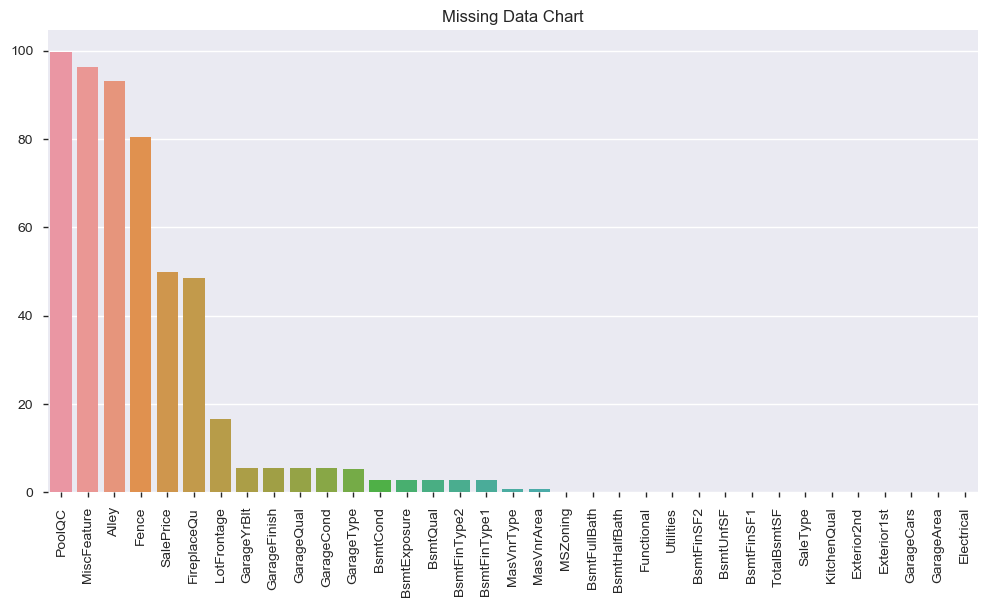

In [14]:
#In addition to the missing values warning shown in the pandas_profiling EDA report, let also visualise the missing values

full_data_na = (full_data.isnull().sum() / len(full_data)) * 100
full_data_na = full_data_na.drop(full_data_na[full_data_na == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=full_data_na.index, y=full_data_na)
plt.title('Missing Data Chart')

Examining both the above chart and the warnings of the pandas_profiling EDA report from the perspective of the dataset description [here,](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt) reveals the following interesting facts:

    1.The NA's in the categorical features means that those features were not available and these turned out as missing values in the dataset. If it was actually the case that these features were not available, resolving this would have just been to fill the missing categorical values with "None" in our data pre-processing stage. Otherwise, we need to determine the samples values of these categorical features.
    
    2.To confirm if the categorical features are truly not available ("NA") for the samples in question, we check the corresponding values of the numerical features that measures this categorical features to see if they are zeros. 
    
    3. The percentages of missing values for some of the categorical features are not equal to the percentage of zeros for the various numerical features that measure them. This indicates that not all of the missing values for the categorical features means that the features were not available. Some may actually be as a result of ommission and would therefore need to be determined.
    
    4. This analysis is also applicable to missing values of numerical features. If a house has a value for a particular categorical feature but the numerical measure of this feature is missing, then we need to determing it.

#### Plot a heatmap to visualise the correlation among the top 10 most correlated feature 

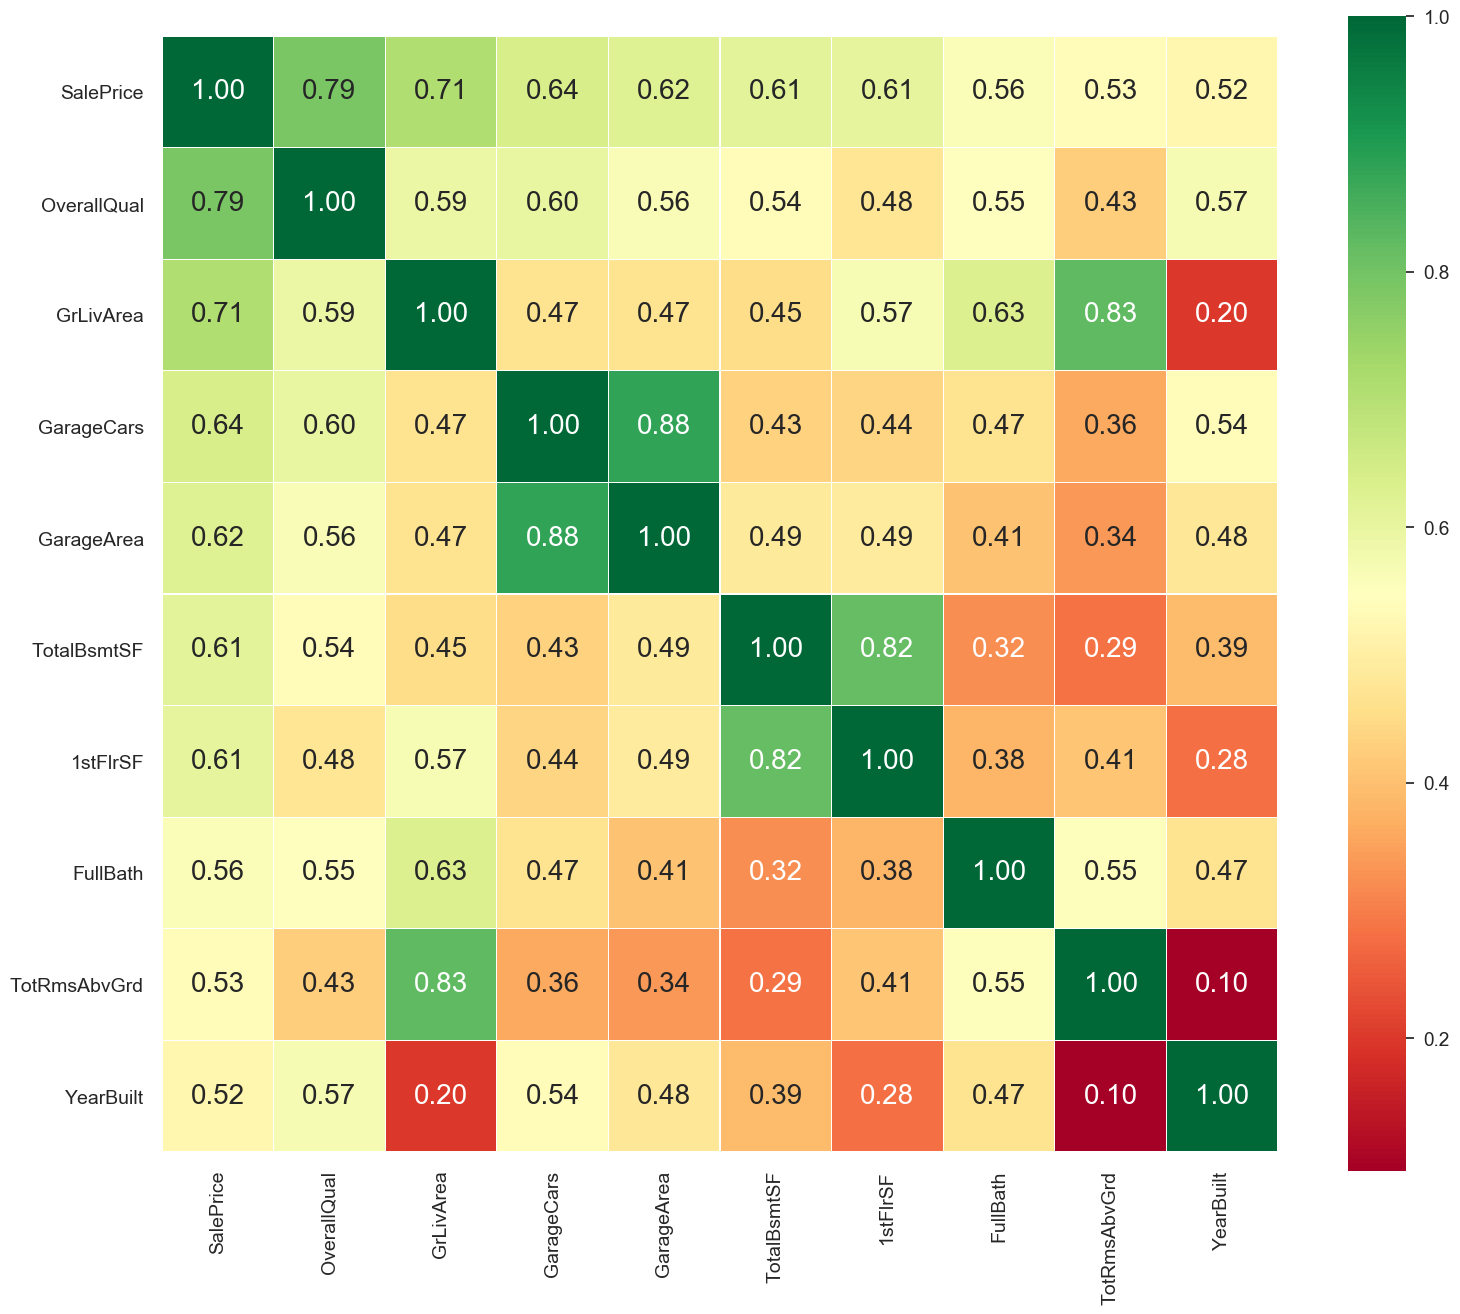

In [15]:
#Plot a heatmap to visualise the correlation among the top 10 most correlated feature 

k = 10 #number of variables for heatmap
corr_mat = train.corr()
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
crm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

sns.heatmap(crm, cbar=True,annot=True,square=True, fmt='.2f', cmap='RdYlGn',linewidths=0.2,annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values) 
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Analysing The Heatmap
The heatmap of the 10 most correlated features above reported a somewhat high correlation (about 88%) between __GarageArea__ and __GarageCars__. However, I believe we should still keep both features.

In [16]:
#Get the 10 features that are least correlated with "SalesPrice"
train_id_less = train.drop(['Id'], axis=1, inplace=False) #Drop the Id column from the train dataset
corr_table = train_id_less.corr()[['SalePrice']]
corr_table = abs(corr_table)
corr_table.sort_values(by=["SalePrice"], ascending=False, inplace=True)
corr_table[-10:] 


,SalePrice
PoolArea,0.092404
MSSubClass,0.084284
OverallCond,0.077856
MoSold,0.046432
3SsnPorch,0.044584
YrSold,0.028923
LowQualFinSF,0.025606
MiscVal,0.021190
BsmtHalfBath,0.016844
BsmtFinSF2,0.011378


#### Searching for Irrelevant Features
The "corr_table" above showing the 10 features that are least correlated with the target feature is computed in a bid to find out if there are explanatory features that are not at all correlated (zero or very minimal correlation) with the target feature "SalePrice".

As we can from the table there are no features with zero or extremely minimal correlation with "SalePrice". So no feature should be dropped on the basis of that. 

#### Show the highly skewed features table

In [49]:
#Generate a table showing the skewness of the features sorted in descending order and select the top 10 skewed features
numeric_feats = full_data.dtypes[full_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = full_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness_table = pd.DataFrame({'skewness' :skewed_feats})
skewness_table#.head(10)



Skew in numerical features: 



,skewness
PoolArea,16.970894
3SsnPorch,8.841971
LowQualFinSF,8.522086
MiscVal,5.107188
BsmtHalfBath,3.746051
ScreenPorch,2.913655
KitchenAbvGr,2.758892
BsmtFinSF2,2.395003
EnclosedPorch,1.931579
WoodDeckSF,1.838835


#### Analysing the Skewness Table

From the computed skewness table we can see that in addition to the __MiscVal__ feature earlier identified, there are seven other continuous numerical features ("PoolArea","LotArea","LowQualFinSF","3SsnPorch", "BsmtFinSF2", "EnclosedPorch","ScreenPorch") with relatively high skewness that need to be transformed.

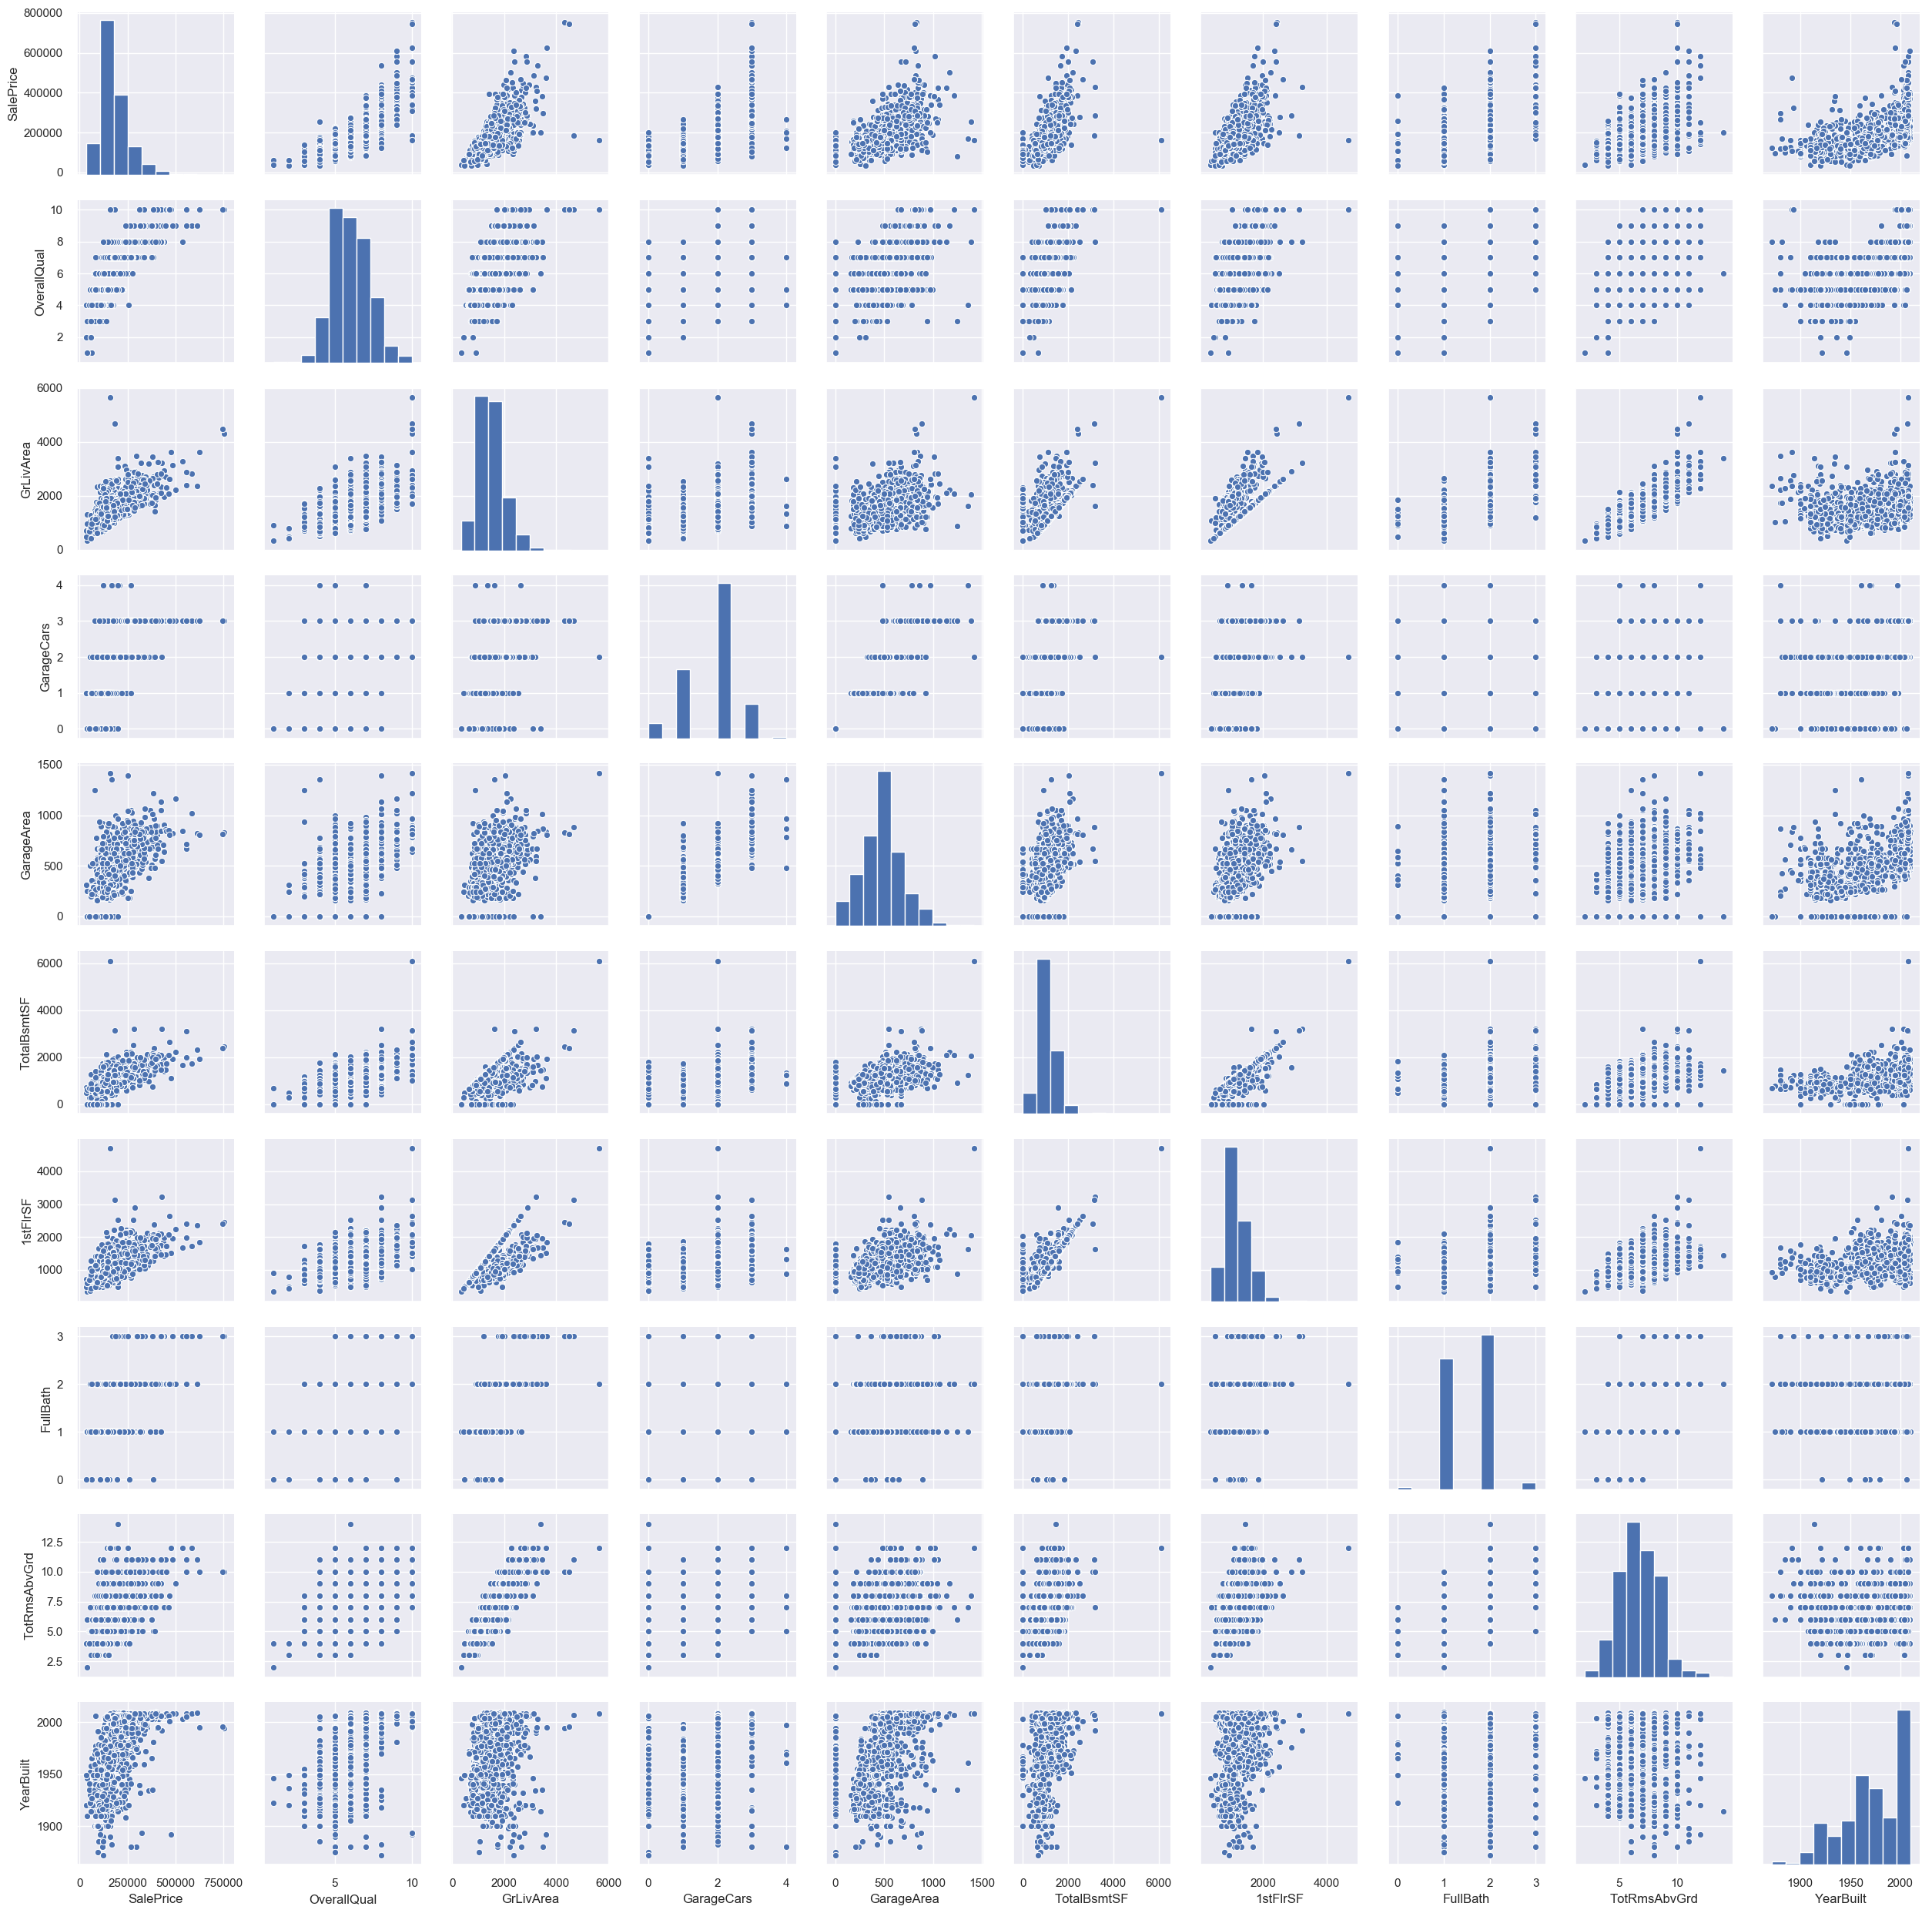

In [18]:
#Do a pairplot of the 10 most correlated features
sns.set()
sns.pairplot(train[cols], size = 2.5)
plt.show()


#### Scanning the Pairplots for Outliers
A cursory look at the above pairplot shows that there are outliers in the **GrLivArea**, **TotalBsmtSF** and **1stFlrSF** features, which should be dropped at the pre-processing stage

### Data Pre-processing

#### Transform the Skewed Target Feature using simple log transformation

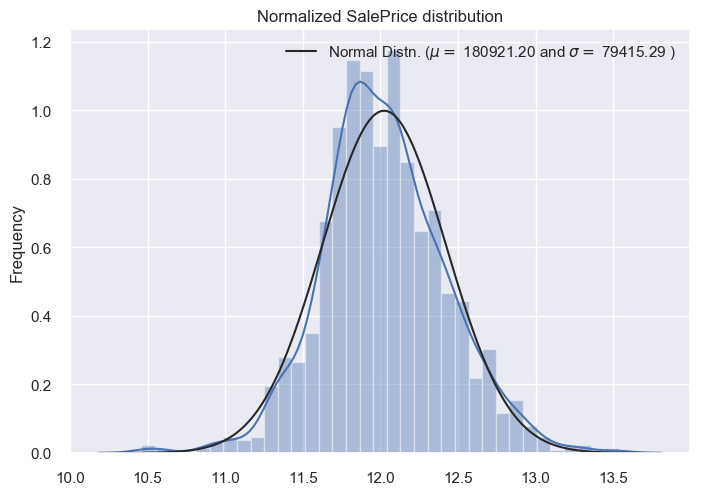

<Figure size 800x550 with 0 Axes>

The transformed SalePrice distribution is obviously much normal now


In [19]:
#Transform the "SalePrice" using np.log
new_SalePrice = np.log1p(target_feat)

#Plot the new distribution to see if it's normal
sns.distplot(new_SalePrice, fit=norm)
# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(new_SalePrice)
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal Distn. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Normalized SalePrice distribution')
fig = plt.figure()
plt.show()

print("The transformed SalePrice distribution is obviously much normal now")

#### Handling Features with Missing Values

Examining both the Missing Data chart and the warnings of the pandas_profiling EDA report above from the perspective of the dataset description [here,](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt) reveals the following interesting facts:

    1.The NA's in the categorical features means that those features were not available and these turned out as missing values in the dataset. If it was actually the case that these features were not available, resolving this would have just been to fill the missing categorical values with "None" in our data pre-processing stage. Otherwise, we need to determine the samples values of these categorical features.
    
    2.To confirm if the categorical features are truly not available ("NA") for the samples in question, we check the corresponding values of the numerical features that measures this categorical features to see if they are zeros. 
    
    3. The percentages of missing values for some of the categorical features are not equal to the percentage of zeros for the various numerical features that measure them. This indicates that not all of the missing values for the categorical features means that the features were not available. Some may actually be as a result of ommission and would therefore need to be determined.
    
    4. This analysis is also applicable to missing values of numerical features. If a house has a value for a particular categorical feature but the numerical measure of this feature is missing, then we need to determing it.

_**First let us separate the features with missing values into categorical and numerical features to enable us precess them differently**_

In [20]:
#First, we make lists of the various features types from the classification we did at the beginning of this Jupyter notebook
nom_cat = ["MSSubClass","MSZoning","Street","Alley","LotShape","Neighborhood","RoofStyle","RoofMatl","Exterior1st",
                "Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","GarageType","MiscFeature","MoSold",
                "SaleType","SaleCondition"]

ord_cat = ["LandContour","Utilities","LotConfig","LandSlope","Condition1","Condition2","BldgType","HouseStyle",
            "OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
            "BsmtFinType2","HeatingQC","Electrical","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond",
            "PavedDrive","PoolQC","Fence","KitchenQual"]

discr_num = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces",
            "GarageYrBlt","GarageCars","YrSold","YearBuilt","YearRemodAdd"]

cont_num = ["2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch",
            "ScreenPorch","PoolArea","MiscVal","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1",
            "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF"]

#Then we combine the nominal and ordinal categorical features into a single list; 
#and the discrete and continuous numerical features into anoyther list
cat_feat = nom_cat + ord_cat
num_feat = discr_num + cont_num



In [21]:
#Get the array of features with missing values from the analysis of missing values above
feat_miss = full_data_na.index.values

#Now we separate the list of features with missing values into categorical and numeric features
miss_cat = []
miss_num = []
for fm in feat_miss:
    if fm in cat_feat:
        miss_cat.append(fm)
    else:
        miss_num.append(fm)
    
print("The numerical features with missing values are:{}".format(miss_num))
print()
print("The categorical features with missing values are:{}".format(miss_cat))

The numerical features with missing values are:['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageCars', 'GarageArea']

The categorical features with missing values are:['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Electrical']


_**Quick fix categorical features missing values**_

From this [work](https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe) we can identify some quick fix categorical features missing values and fill them with the recommended values as follows:

    Functional: Fill with "Typ", as assumed in the data decsription document
    Electrical: Every house has this so let's impute the most common value: "SBrkr".
    KitchenQual: Every house has this so let's impute the most common value: "TA".
    Exterior 1 and Exterior 2:We use the most common value here.
    SaleType: Similar to electrical, let's use most common value.
    

In [22]:
full_data['Functional'] = full_data['Functional'].fillna('Typ')
full_data['Electrical'] = full_data['Electrical'].fillna("SBrkr")
full_data['KitchenQual'] = full_data['KitchenQual'].fillna("TA")

full_data['Exterior1st'] = full_data['Exterior1st'].fillna(full_data['Exterior1st'].mode()[0])
full_data['Exterior2nd'] = full_data['Exterior2nd'].fillna(full_data['Exterior2nd'].mode()[0])

full_data['SaleType'] = full_data['SaleType'].fillna(full_data['SaleType'].mode()[0])

_**Now let us examine features with large numbers of missing values and determine those values that should be available but were omitted**_

_**PoolQC**_

In [23]:
#PoolQC
pq_missing =  full_data[full_data.PoolArea != 0][["PoolArea", "PoolQC"]]#full_data[(full_data['PoolQC'] != None) & (full_data['PoolArea'] == 0)][["PoolArea", "PoolQC"]]
pq_missing


,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
1974,144,Ex
2420,368,NaN
2503,444,NaN


From the above result we can see that **PoolQC** should have values for observations **960, 1043, and 1139**. To average off this distribution we will impute **Fa** for two of the missing values and either **Ex** or **Gd** for the last one.

In [24]:
full_data.loc[960, "PoolQC"] = "Fa"
full_data.loc[1043, "PoolQC"] = "Gd"
full_data.loc[1139, "PoolQC"] = "Fa"

_**MiscFeature, Fence and Utilities**_

In [25]:
mf_missing = full_data[(full_data.MiscFeature.isnull()) & (full_data.MiscVal != 0)][["MiscVal", "MiscFeature"]]#[["Neighborhood", "YearBuilt", "YearRemodAdd", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]
mf_missing


,MiscVal,MiscFeature
2549,17000,NaN


From the above cell we see that there is just one case where **MiscFeature** has no value and **MiscVal** is not zero. Since both **MiscFeature** and **MiscVal** tend to measure exactly the same thing they can be substituted for each other to a very high degree. As a result, we may as well delete the **MiscFeature** because of it's high proportion of missing values in order not to distort the data. The same goes with the **Fence** and **Utilities** features

In [26]:
#Let us drop MiscFeature, Fence and Utilities in
full_data = full_data.drop(["Fence", "MiscFeature", "Utilities"], axis=1)

_**Garage**_

In [27]:
#Let's check if there are houses with garages but has NaN's for any of the Garage variables.
full_data[(full_data['GarageType'] == 'Detchd') & full_data['GarageYrBlt'].isnull()]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2126,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,Inside,...,0,0,0,NaN,1000,9,2008,WD,Normal,NaN
2576,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,Inside,...,0,0,0,NaN,0,3,2007,WD,Alloca,NaN


From the above output we see that there are houses with garages that are detached but that have NaN's GarageYrBlt and for all other Garage variables. Let's impute these manually too. Refer to this [work](https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe) for more information

In [28]:
# Garage
full_data.loc[666, "GarageYrBlt"] = 1979
full_data.loc[1116, "GarageYrBlt"] = 1979
 
full_data.loc[666, "GarageFinish"] = "Unf"
full_data.loc[1116, "GarageFinish"] = "Unf"
 
full_data.loc[1116, "GarageCars"] = 2
full_data.loc[1116, "GarageArea"] = 480
 
full_data.loc[666, "GarageQual"] = "TA"
full_data.loc[1116, "GarageQual"] = "TA"
 
full_data.loc[666, "GarageCond"] = "TA"
full_data.loc[1116, "GarageCond"] = "TA"

_**Basement**_

Let's consider missing values of the basement features:

    BsmtQual
    BsmtCond
    BsmtExposure
    BsmtFinType1
    BsmtFinType2
    BsmtFinSF1
    BsmtFinSF2
    BsmtUnfSF
    TotalBsmtSF

In [29]:
#Select observations where some basement features have values while other have "NaN"
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF']

tempdf = full_data[basement_columns]
tempdfnulls = tempdf[tempdf.isnull().any(axis=1)]

#now select just the rows that have less then 5 NA's, meaning there is incongruency in the row.
tempdfnulls[(tempdfnulls.isnull()).sum(axis=1) < 5]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
332,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0
948,Gd,TA,NaN,Unf,Unf,0.0,0.0,936.0,936.0
1487,Gd,TA,NaN,Unf,Unf,0.0,0.0,1595.0,1595.0
2040,Gd,NaN,Mn,GLQ,Rec,1044.0,382.0,0.0,1426.0
2185,TA,NaN,No,BLQ,Unf,1033.0,0.0,94.0,1127.0
2217,NaN,Fa,No,Unf,Unf,0.0,0.0,173.0,173.0
2218,NaN,TA,No,Unf,Unf,0.0,0.0,356.0,356.0
2348,Gd,TA,NaN,Unf,Unf,0.0,0.0,725.0,725.0
2524,TA,NaN,Av,ALQ,Unf,755.0,0.0,240.0,995.0


We impute all incongruencies with the most likely value.

In [30]:
full_data.loc[332, 'BsmtFinType2'] = 'ALQ' #since smaller than SF1
full_data.loc[947, 'BsmtExposure'] = 'No' 
full_data.loc[1485, 'BsmtExposure'] = 'No'
full_data.loc[2038, 'BsmtCond'] = 'TA'
full_data.loc[2183, 'BsmtCond'] = 'TA'
full_data.loc[2215, 'BsmtQual'] = 'Po' #v small basement so let's do Poor.
full_data.loc[2216, 'BsmtQual'] = 'Fa' #similar but a bit bigger.
full_data.loc[2346, 'BsmtExposure'] = 'No' #unfinished bsmt so prob not.
full_data.loc[2522, 'BsmtCond'] = 'Gd' #cause ALQ for bsmtfintype1


_**MSZoning**_

In [31]:
#Fill the missing MSZoning values for any particular house with the most common MSZoning value within the MSSubClass 
#where the houase falls
full_data['MSZoning'] = full_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

_**LotFrontage**_

In [32]:
#LotFrontage is the linear feet of street connected to property. 
#This should be linked to what kind of neighborhood the house is located live in, so we fill in the missing vakues with the median per neighborhood
full_data['LotFrontage'] = full_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


_**Other Missing Values**_

In [33]:
from sklearn.impute import SimpleImputer

#Now let's impute "none" for the remaining missing values for the categorical features
#Get the new categorical features list, i.e, excluding any of the dropped features
new_miss_cat = [x for x in miss_cat if x not in ["Fence", "MiscFeature", "Utilities"]]
full_data[new_miss_cat] = full_data[new_miss_cat].fillna("None")
full_data.head()

"""
imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value = "none")
imputer = imputer.fit(full_data[new_miss_cat])
full_data[new_miss_cat] = imputer.transform(full_data[new_miss_cat])
"""
#Now let's impute 0 for the remaining missing values of the numerical features
#Get the new numeric features list, i.e, excluding any of the dropped features
new_miss_num = [x for x in miss_num if x not in ["Fence", "MiscFeature", "Utilities"]]
full_data[new_miss_num] = full_data[new_miss_num].fillna(0)
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,0,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,0,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,0,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,0,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,0,None,0,12,2008,WD,Normal,250000.0


#### Handling Incorrect values

Wrong values can adversely impact our model and one way of detecting incorrect values is to examine the min and max values to check odd values in the data.

From examining the pandas_profiling EDA output at the beginning of this notebook we discover that the _**GarageYrBlt**_ feature has a rather strange value, 2207. This is obviously wrong since the data ended in 2010.

Let's inspect this row on order to discover the correct value.

In [34]:
full_data[full_data['GarageYrBlt'] == 2207]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2592,2593,20,RL,68.0,8298,Pave,None,IR1,HLS,Inside,...,0,0,0,None,0,9,2007,New,Partial,0.0


This particular datapoint has YearBuilt in 2006 and YearRemodAdd in 2007. 2207 most likely is a data input error that should have been 2007 when the remodel happened. Let's impute 2007.

In [35]:
full_data.loc[2590, 'GarageYrBlt'] = 2007

#### Handling Outliers

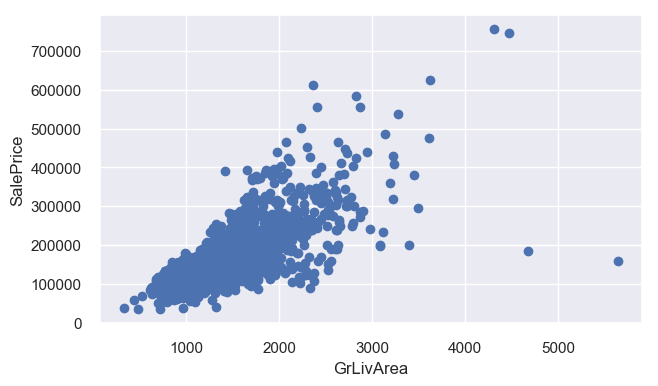

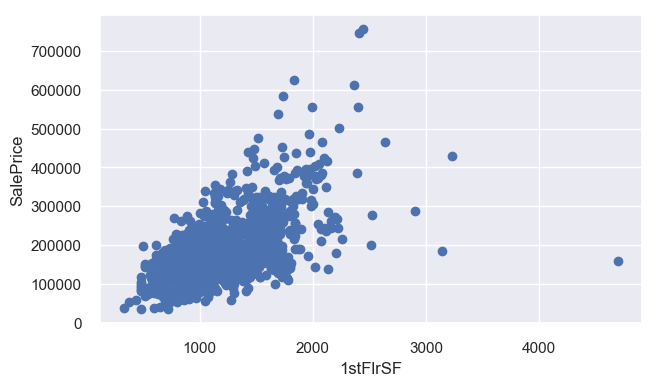

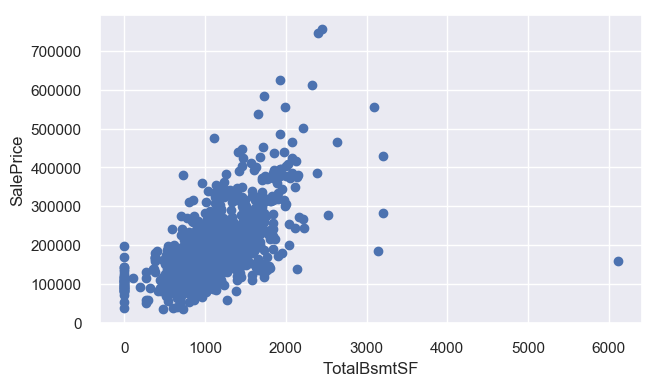

In [36]:
# Let us isolate the individual scatter plots of the features with outliers (i.e GrLivArea, TotalBsmtSF and 1stFlrSF) 
#to explore the exact values of the outliers
out_feat = {"GrLivArea", "TotalBsmtSF", "1stFlrSF"}
fig.suptitle('Features with Outliers')
for feature in (out_feat):
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.scatter(x=train[feature],y=train["SalePrice"])#, ax=ax)#(x = train['GrLivArea'], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

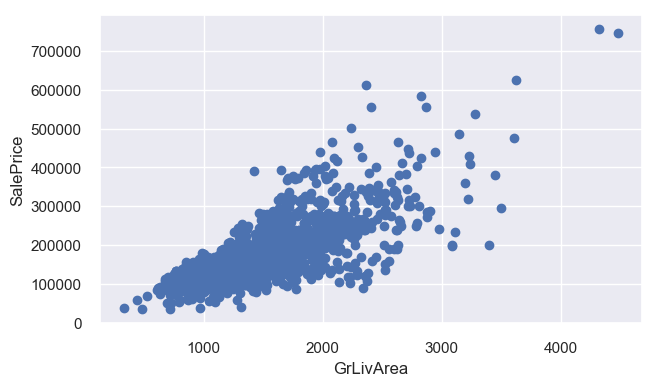

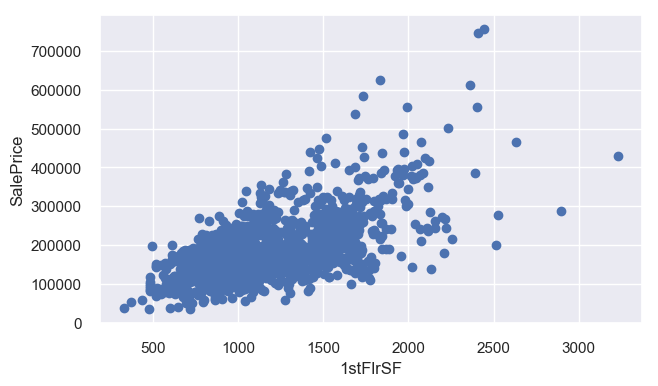

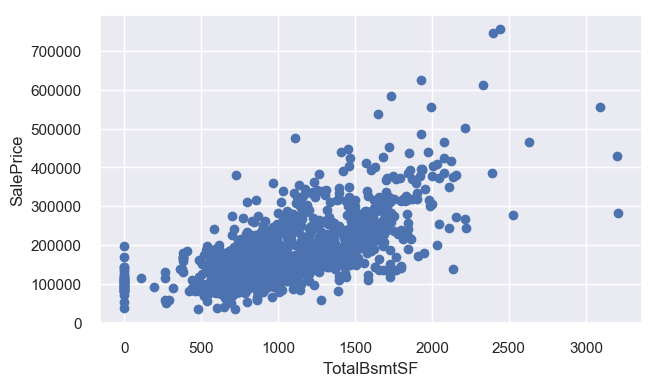

In [37]:
#Drop the outliers from the features in question
#make a copy of the train dataset
train_copy = train.copy()
for ft in out_feat:
    new_train = train_copy.drop(train_copy[(train_copy[ft]>4000) & (train_copy['SalePrice']<200000)].index)
    train_copy = new_train

#Plot new scatterplots for the old "train" and "new_train" datasets to confirm the dropping of the outlier observations
for feature in (out_feat):
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.scatter(x=new_train[feature],y=new_train["SalePrice"])#, ax=ax)#(x = train['GrLivArea'], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()


For outliers that we cannot easily see from the scatter plot let us identify and delete them using Ridge and ElasticNet to train based on [this work](https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions)

The Ridge and ElasticNet are used to train the training set and predict the training set. Then isolate the samples with unpredictable prediction results in the two algorithms as outliers)

_Get train dummies_

In [38]:
"""#copy the full data
dummy_df = full_data.copy

#get the new nominal categorical variables, i.e, excluding the deleted features
new_nom_cat = [x for x in nom_cat if x not in ["Fence", "MiscFeature", "Utilities"]]

#get dummies of the nominal categorical variables
dummy_df[new_nom_cat] = pd.get_dummies()
"""
train_dummies = pd.get_dummies(full_data.drop(["SalePrice", "Id"], axis=1).iloc[: train.shape[0]])
train_dummies.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


**Use Ridge to find outliers**

In [39]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_score, train_test_split

y = new_SalePrice
rr = KernelRidge(alpha=10)
rr.fit(train_dummies, y)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.14003891713711783

In [40]:
y_pred = rr.predict(train_dummies)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  30,   88,  142,  277,  318,  328,  365,  410,  438,  462,  495,
        523,  533,  581,  588,  628,  632,  681,  688,  710,  714,  728,
        774,  812,  874,  898,  916,  935,  968,  970, 1062, 1168, 1181,
       1182, 1298, 1324, 1383, 1423, 1432, 1453])

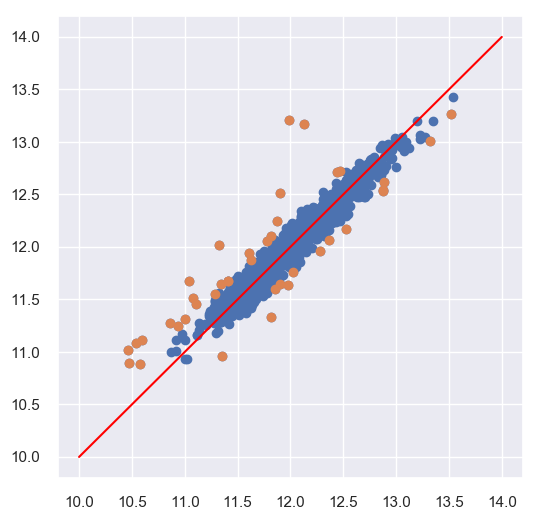

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers1], y_pred[outliers1])
plt.plot(range(10, 15), range(10, 15), color="red")

**Use ElasticNet to find Outliers**

In [42]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LassoCV
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(train_dummies, y)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.14003891713711783

In [43]:
y_pred_er = er.predict(train_dummies)
resid_er = y.iloc[:,0] - pd.DataFrame(y_pred_er).iloc[:,0] #little transformation to make the code work
mean_resid_er = resid_er.mean()
std_resid_er = resid_er.std()
z_er = (resid_er - mean_resid_er) / std_resid_er
z_er = np.array(z_er)
outliers2 = np.where(abs(z_er) > abs(z_er).std() * 3)[0]
outliers2

array([  30,   88,  142,  277,  328,  410,  438,  457,  462,  495,  523,
        533,  581,  588,  628,  632,  666,  681,  688,  710,  711,  714,
        728,  738,  774,  812,  874,  898,  916,  968,  970, 1181, 1182,
       1298, 1324, 1383, 1423, 1432, 1453])

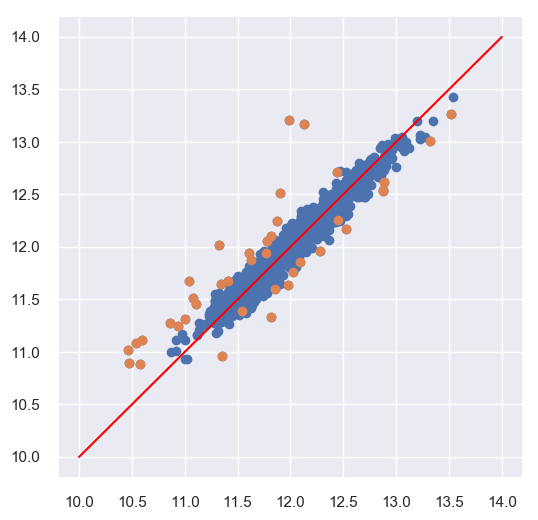

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers2], y_pred[outliers2])
plt.plot(range(10, 15), range(10, 15), color="red")

**The point where the two algorithms predict poor results is used as the outlier**

In [45]:
outliers = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outliers.append(i)
print(outliers)

[30, 88, 142, 277, 328, 410, 438, 462, 495, 523, 533, 581, 588, 628, 632, 681, 688, 710, 714, 728, 774, 812, 874, 898, 916, 968, 970, 1181, 1182, 1298, 1324, 1383, 1423, 1432, 1453]


**Delete outliers**

In [46]:
new_train = full_data.iloc[: train.shape[0]].drop(outliers)
new_test = full_data.iloc[train.shape[0]:]
new_SalePrice = new_train["SalePrice"]
new_train_Id = new_train["Id"]
new_test_Id = id_test

new_train = new_train.drop(["SalePrice", "Id"], axis=1)
new_test = new_test.drop(["SalePrice", "Id"], axis=1)
full_data = pd.concat([new_train,new_test], axis=0)
full_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,0,0,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,0,0,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,0,0,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,272,0,0,0,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,0,0,None,0,12,2008,WD,Normal


#### Handling Highly Skewed Numeric Features

In [50]:
#Let's get the list of the highly skewed features from the skewness_table generated earlier
skew_list = list(skewness_table.index.values)[:25]
 
#Box Cox Transform these skewed explanatory continuous numerical features
from scipy.special import boxcox1p
lam = 0.15
for snf in skew_list:
    full_data[snf] = boxcox1p(full_data[snf], lam)
#full_data.head()

#### Normalize the Numeric Features

In [51]:
#initiallize dataframe of numerical features
num_df = full_data[num_feat]
#Normalize the numerical features in the new_full_data
full_data[num_feat] = (num_df-num_df.mean())/num_df.std()
full_data[num_feat].head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,...,PoolArea,MiscVal,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF
0,1.127848,-0.252190,0.781893,1.258612,0.250558,-0.185862,1.022799,-0.981987,0.291603,0.305089,...,-0.058941,-0.191164,-0.074068,-0.095360,1.242129,0.798861,-0.368155,-0.543777,-0.070749,-0.791691
1,-0.836446,3.917484,0.781893,-0.766108,0.250558,-0.185862,-0.215188,0.752153,0.230624,0.305089,...,-0.058941,-0.191164,0.573646,0.154661,-0.808186,0.973465,-0.368155,-0.128852,0.423087,0.410641
2,1.127848,-0.252190,0.781893,1.258612,0.250558,-0.185862,-0.215188,0.752153,0.287086,0.305089,...,-0.058941,-0.191164,0.064836,0.464899,1.210468,0.609100,-0.368155,0.170111,0.018806,-0.573654
3,1.127848,-0.252190,-1.030791,-0.766108,0.250558,-0.185862,0.436781,0.752153,0.280310,1.624242,...,-0.058941,-0.191164,-0.317981,0.144437,-0.808186,0.232295,-0.368155,0.331862,-0.222776,-0.440652
4,1.127848,-0.252190,0.781893,1.258612,1.275973,-0.185862,1.555855,0.752153,0.284827,1.624242,...,-0.058941,-0.191164,0.729012,0.927641,1.333863,0.759891,-0.368155,0.259279,0.296586,0.102651


In [52]:
#Generate and add new numerical variables
full_data['YrBltAndRemod']=full_data['YearBuilt']+full_data['YearRemodAdd']
full_data['TotalSF']=full_data['TotalBsmtSF'] + full_data['1stFlrSF'] + full_data['2ndFlrSF']

full_data['Total_sqr_footage'] = (full_data['BsmtFinSF1'] + full_data['BsmtFinSF2'] +
                                 full_data['1stFlrSF'] + full_data['2ndFlrSF'])

full_data['Total_Bathrooms'] = (full_data['FullBath'] + (0.5 * full_data['HalfBath']) +
                               full_data['BsmtFullBath'] + (0.5 * full_data['BsmtHalfBath']))

full_data['Total_porch_sf'] = (full_data['OpenPorchSF'] + full_data['3SsnPorch'] +
                              full_data['EnclosedPorch'] + full_data['ScreenPorch'] +
                              full_data['WoodDeckSF'])

#### Handling Ordinal Categorical Features

In [53]:
#Get the new ordinal categorical variables, i.e, excluding the deleted features
new_ord_cat = [x for x in ord_cat if x not in ["Fence", "MiscFeature", "Utilities"]]
uniq_obs = []
for od in new_ord_cat:
    vals = list(sorted(full_data[od].unique()))
    uniq_obs.append(vals)
    
#Print the list of the lists of unique values of the ordinal categorical features 
print(uniq_obs)

[['Bnk', 'HLS', 'Low', 'Lvl'], ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], ['Gtl', 'Mod', 'Sev'], ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn'], ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'], ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.7304631471189666, 1.1943176378757767, 1.5409627556327752, 1.8203341036428238, 2.055641538058108, 2.2596737867230705, 2.440268378362637, 2.6025944687727294, 2.750250297485029], ['Ex', 'Fa', 'Gd', 'TA'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['Ex', 'Fa', 'Gd', 'None', 'Po', 'TA'], ['Fa', 'Gd', 'None', 'Po', 'TA'], ['Av', 'Gd', 'Mn', 'No', 'None'], ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf'], ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], ['Ex', 'Fa

To correctly transform our ordinal features we must ensure that the orders of the categories are respected. 

To achieve this requires that we pass an ordered list of the unique values for the features to the categories parameter in the sklearn OrdinalEncoder class.

This means that we must manaually guarantee an ordered list of the unique string values for those ordinal categorical features with string values. Since python does not know the true orders of the string values. 

Again, we can ascertain the correct orders of the string values by referring to the dataset description [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt)

In [54]:
from sklearn.preprocessing import OrdinalEncoder
#Generate the list of correctly ordered lists of unique ordinal features values in the sequence that they appear in "ord_cat" earlier defined
ordered_feat_value = [['Low','Lvl','Bnk', 'HLS'],['Inside','Corner', 'CulDSac', 'FR2', 'FR3'],
                     ['Sev', 'Mod','Gtl'],['Artery', 'Feedr', 'Norm','RRNn','RRAn', 'PosN','PosA','RRNe','RRAe'],
                     ['Artery', 'Feedr', 'Norm','RRNn','RRAn', 'PosN','PosA','RRNe','RRAe'],['1Fam','2fmCon','Twnhs','TwnhsE','Duplex'],
                     ['1Story','1.5Unf','1.5Fin','SFoyer','SLvl','2Story','2.5Unf', '2.5Fin'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     [1, 2, 3, 4, 5, 6, 7, 8, 9],['Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['none','Fa','TA','Gd','Ex'],
                     ['none','Po','Fa', 'TA','Gd'],['none','No','Mn', 'Av', 'Gd'],['none','Unf','LwQ','Rec', 'BLQ','ALQ','GLQ'],
                     ['none','Unf','LwQ','Rec', 'BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['none','Mix','FuseP','FuseF','FuseA','SBrkr'],
                     ['none','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['none','Po', 'Fa','TA','Gd','Ex'],['none','Unf','RFn','Fin'],
                     ['none','Po','Fa','TA','Gd','Ex'],['none','Po','Fa','TA','Gd','Ex'],['N', 'P', 'Y'],['none','Fa','Gd','Ex'],
                     ['none','Fa','TA','Gd','Ex']]

for ftr,ordv in zip(new_ord_cat,ordered_feat_value):
    cat = pd.Categorical(full_data[ftr],categories = ordv, ordered = True)
    labels, unique = pd.factorize(cat, sort=True)
    full_data[ftr] = labels
    

#### Handling Nominal Categorical Features (One-Hot-Encoding) and Multicollinearity

In [55]:
#We adopt the pd.get_dummies to transform the nominal categorical features, while inserting the drop_first=True arguement
#to handle the multicollinearity that may result

#Get the new nominal categorical variables, i.e, excluding the deleted features
new_nom_cat = [x for x in nom_cat if x not in ["Fence", "MiscFeature", "Utilities"]]

encoded_nom = pd.get_dummies(full_data[new_nom_cat],drop_first=True)

#Drop the former nominal categorical features from new_full_data and concatenate the encoded norminal categorical features
full_data = full_data.drop(new_nom_cat, axis=1, inplace=False)
full_data = pd.concat([full_data, encoded_nom], axis=1)

# Generate and add new simplified nominal categorical features
full_data['haspool'] = full_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
full_data['has2ndfloor'] = full_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
full_data['hasgarage'] = full_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
full_data['hasbsmt'] = full_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
full_data['hasfireplace'] = full_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


#To prevent overfitting let's remove columns that have more than 99.94% 1 or 0 after doing pd.get_dummies.
overfit = []
for i in full_data[encoded_nom.columns]:
    counts = full_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(full_data) * 100 >99.94:
        overfit.append(i)

full_data.drop(overfit,axis=1,inplace=True)


In [56]:
len(new_train)#-len(new_train)

1425

## Modelling

We want to compare the model performance among (i) LASSO (or kernel ridge regression), (ii) random forests regression, (iii) XGBoost, and (iv) stacking (v) Any other method we find effective.

### Define a model selection function

In [57]:
#Import necesaary libraries and modules
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold , KFold
from sklearn.metrics import make_scorer

#get the fully and finally processed training and test data
#full_data = full_data.drop(["SalePrice"], axis=1)
train_final = full_data[:len(new_train)]
test_final = full_data[len(new_train):]
new_SalePrice = np.log1p(new_SalePrice)

#Now here's the model selection function
def mod_sel_cv(model):
    kf = KFold(n_splits=10, shuffle=True, random_state=25).get_n_splits(train_final.values)
    scorer = np.sqrt(-cross_val_score(model, train_final.values, new_SalePrice.values,scoring="neg_mean_squared_error", cv=kf))
    return scorer

### Initialize, Fit and Score the Base Models

### Lasso

In [58]:
#We use the sklearn's Robustscaler() method to make the model more robust on outliers
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0004,max_iter=610,random_state=1))
score1 = mod_sel_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))


Lasso score: 0.0977 (0.0068)



#### Kernel Ridge Regression

In [59]:
#We use the sklearn's Robustscaler() method to make the model more robust on outliers
KRR = make_pipeline(RobustScaler(),KernelRidge(alpha=0.1, kernel="polynomial", degree=1, coef0=4.5))
score2 = mod_sel_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))

Kernel Ridge score: 0.0986 (0.0078)



#### Random Forest Regression

In [60]:
#We use the sklearn's Robustscaler() method to make the model more robust on outliers
RFR = RandomForestRegressor(max_depth=8, random_state=0,n_estimators=2200)
score3 = mod_sel_cv(RFR)
print("Random Forest Regression score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Random Forest Regression score: 0.1227 (0.0113)



In [ ]:
"""tuned_param6 = {"subsample":np.arange(0.1, 0.95, 0.05).tolist()}
grid6 = GridSearchCV(estimator = xgb.XGBRegressor(), param_grid = tuned_param6, cv = 5, n_jobs=-1)
grid_result6 = grid6.fit(train_final.values, new_SalePrice.values)
opt_para6 = grid_result6.best_params_
print(opt_para6)
"""

#### XGBoost

In [ ]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=3.5, n_estimators=2200,
                             reg_alpha=0.2500, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score4 = mod_sel_cv(xg_reg)
print("XGBoost score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

#### Elastic Net Regression 

In [ ]:
#We use the sklearn's Robustscaler() method to make the model more robust on outliers
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00025, l1_ratio= 0.90, random_state=1))
score5 = mod_sel_cv(ENet)
print("Elastic Net Regression score: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()))

#### Gradient Boosting Regression

In [ ]:
#We use the huber loss to make the model more robust to outliers
GBR = GradientBoostingRegressor(n_estimators=2200, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', subsample=0.85, random_state =5)
score7 = mod_sel_cv(GBR)
print("Gradient Boosting Regression score: {:.4f} ({:.4f})\n".format(score7.mean(), score7.std()))

#### Light Gradient Boosting Regression

In [ ]:
import lightgbm as lgb
ml_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=8,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 100, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 6)

score_lgb = mod_sel_cv(ml_lgb)
print("Light Gradient Boosting Regression score: {:.4f} ({:.4f})\n".format(score_lgb.mean(), score_lgb.std()))


### Stacking models

#### Averaged Base Models Stacking
For this stacked generalization, we will average five of the top performing base models (lasso,ENet,KRR,GBR,xg_reg). 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

    
averaged_models = AveragingModels(models = (lasso,ENet,KRR,GBR,ml_lgb,xg_reg))

score = mod_sel_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

So far, the __Averaged Base Model__ returns a score better than the other models 

#### Stacking Averaged Models
Now let's also see the performance of a stacked model with a meta_model 

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                #define out_of_fold_predictions[holdout_index, i] as 1D array for it to work in my code
                oofp = np.zeros(out_of_fold_predictions[holdout_index, i].shape[0]) 
                oofp = y_pred

        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
    

        
stacked_averaged_models = StackingAveragedModels(base_models = (lasso,ENet,KRR,GBR,ml_lgb),meta_model = xg_reg)

score_st = mod_sel_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score_st.mean(), score_st.std()))

Surprisingly, the __Stacking Averaged Models__ returns an extremely low score compared to all the earlier models 

#### Mlxtend Stacking Regressor
For this stacked generalization, we will adopt the __mlxtend Stacking Regressor__ module from mlxtend to see if the model score will increase.

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import cross_validate

stack1 = StackingRegressor(regressors=[ENet,KRR,GBR,lasso,ml_lgb], meta_regressor=xg_reg, verbose=0)
stack_scores = mod_sel_cv(stack1)#cross_validate(stack1, X, y, cv=10)
print("StackingRegressor score: {:.4f} ({:.4f})\n".format(stack_scores.mean(), stack_scores.std()))

The __Mlxtend Stacking Regressor__ also returns a score worse than that of the  __Averaged Base Model__. In the overall, the __Averaged Base Model__ obviously stands out as the better model in terms of their scores.

### Final Training and Prediction¶

#### Averaged Base Model

In [ ]:
averaged_models.fit(train_final.values, new_SalePrice.values)
average_model_train_pred = averaged_models.predict(train_final.values)
average_model_test_pred = np.expm1(averaged_models.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, average_model_train_pred)))
#np.sqrt(mean_squared_error(new_SalePrice.values, model_train_pred))
#train_final.values, new_SalePrice.values

#### Light Gradient Boosting Regression

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',task = "predict",num_leaves=8,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 100, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 6)

model_lgb.fit(train_final.values, new_SalePrice.values)
model_lgb_train_pred = model_lgb.predict(train_final.values)
model_lgb_test_pred = np.expm1(model_lgb.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, model_lgb_train_pred)))

#### Gradient Boosting Regression

In [ ]:
GBR.fit(train_final.values, new_SalePrice.values)
GBR_train_pred = GBR.predict(train_final.values)
GBR_test_pred = np.expm1(GBR.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, GBR_train_pred)))

 #### XGBoost

In [ ]:
xg_reg.fit(train_final.values, new_SalePrice.values)
xg_reg_train_pred = xg_reg.predict(train_final.values)
xg_reg_test_pred = np.expm1(xg_reg.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, xg_reg_train_pred)))

#### Mlxtend Stacking Regressor

In [ ]:
stack1.fit(train_final.values, new_SalePrice.values)
stack1_train_pred = stack1.predict(train_final.values)
stack1_test_pred = np.expm1(stack1.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, stack1_train_pred)))

#### Lasso

In [ ]:
lasso.fit(train_final.values, new_SalePrice.values)
lasso_train_pred = lasso.predict(train_final.values)
lasso_test_pred = np.expm1(lasso.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, lasso_train_pred)))

#### Elastic Net

In [ ]:
ENet.fit(train_final.values, new_SalePrice.values)
ENet_train_pred = ENet.predict(train_final.values)
ENet_test_pred = np.expm1(ENet.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, ENet_train_pred)))

#### Kernel Ridge Regression

In [ ]:
KRR.fit(train_final.values, new_SalePrice.values)
KRR_train_pred = KRR.predict(train_final.values)
KRR_test_pred = np.expm1(KRR.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, KRR_train_pred)))

#### Random Forest Regression

In [ ]:
RFR.fit(train_final.values, new_SalePrice.values)
RFR_train_pred = RFR.predict(train_final.values)
RFR_test_pred = np.expm1(RFR.predict(test_final.values))
print(np.sqrt(mean_squared_error(new_SalePrice.values, RFR_train_pred)))

#### Ensembled Prediction
We do a weighted addition of the predictions of __Averaged Base Model__, __Gradient Boosting Regression__ and __XGBoost__

In [ ]:
#ensemble_pred = model_test_pred*0.45 + stack1_test_pred*0.40 + GBR_test_pred*0.15
#ensemble_pred = 0.1 * average_model_test_pred + 0.3 * GBR_test_pred + 0.3 * model_lgb_test_pred + 0.3 * stack1_test_pred


ensemble_pred =((0.050 * ENet_test_pred) + 
            (0.050 * lasso_test_pred) + 
            (0.050 * KRR_test_pred) + 
            (0.125 * RFR_test_pred) + 
            (0.125 * stack1_test_pred) + 
            (0.1 *  xg_reg_test_pred) + 
            (0.1 * model_lgb_test_pred) + 
            (0.125 * GBR_test_pred ) + 
            (0.275 * average_model_test_pred))
            

ensemble_pred

In [ ]:
#import scipy.optimize as spo
"""from scipy import optimize

def mse_fxn(weights):
    c = weights[0]
    d = weights[1]
    g = weights[2]
    h = weights[3]
    i = weights[4]
    new_pred = ((c * KRR_train_pred) + 
            (d * RFR_train_pred) + 
            (g * model_lgb_train_pred) + 
            (h * GBR_train_pred ) + 
            (i * average_model_train_pred))
             
    mse_score = (np.sqrt(mean_squared_error(new_SalePrice.values, new_pred)))
    return mse_score

ur = (0.05,0.1,)#(0.06,1,0.01) #up_range
#lr = (0.1,1,0.025)#(0.01,.6,0.01) #low_range

opt1 = optimize.brute(mse_fxn,(ur,ur,ur,ur,ur), Ns = 30, full_output=True,finish=None)
print("Global minimum is {}".format(opt1[0]))
print("Minimum MSE score is {}".format(opt1[1]))"""

In [ ]:
len(ensemble_pred)

In [ ]:
subm = pd.DataFrame()
subm['Id'] = new_test_Id
subm['SalePrice'] = ensemble_pred

# Deal with predictions close to outer range 
q1 = subm['SalePrice'].quantile(0.0045)
q2 = subm['SalePrice'].quantile(0.997)

subm['SalePrice'] = subm['SalePrice'].apply(lambda x: x*0.9 if x > q1 else x)
subm['SalePrice'] = subm['SalePrice'].apply(lambda x: x*1.1 if x < q2 else x)
#subm.to_csv('submission.csv',index=False)
subm['SalePrice'].head()

#### References
    1.https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d
    2.https://www.kaggle.com/kernels/scriptcontent/9252125/download
    3.https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
    4.https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda
    5.https://www.kaggle.com/kernels/scriptcontent/2739619/download
    6.https://medium.com/datadriveninvestor/data-preprocessing-for-machine-learning-188e9eef1d2c
    7.https://www.datacamp.com/community/tutorials/xgboost-in-python
    8.https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
    9.https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e
    10.https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models
    11.https://machinelearningmastery.com/implementing-stacking-scratch-python/
    12.https://inclass.kaggle.com/eikedehling/trying-out-stacking-approaches/code
    13.https://www.kaggle.com/firstbloody/an-uncomplicated-model-top-2-or-top-1
    14.https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe

__Kindly upvote if this submission makes some sense to you__